##Loading Dataset

In [2]:
# Import libraries & upload dataset
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [3]:
# Load the dataset and display 5 random sample rows
df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3601,ham,Cps is causing the outages to conserve energy.,NaN,NaN,NaN
3948,ham,HMM yeah if your not too grooved out! And im l...,NaN,NaN,NaN
944,ham,I sent my scores to sophas and i had to do sec...,NaN,NaN,NaN
1585,ham,I was wondering if it would be okay for you to...,NaN,NaN,NaN
5287,ham,Hey ! Don't forget ... You are MINE ... For ME...,NaN,NaN,NaN


In [4]:
# Total rows and columns of dataset
df.shape

(5572, 5)

##Data Cleaning

In [5]:
# Check if unnamed columns contain data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop columns with minimal data
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True) # Drop specified columns permanently (inplace=True)
df.sample(5)

,v1,v2
3036,ham,Cos darren say Ì_ considering mah so i ask Ì_...
4533,ham,I have no money 4 steve mate! !
4010,spam,Please call our customer service representativ...
1766,spam,SMS AUCTION You have won a Nokia 7250i. This i...
1283,ham,Yes i thought so. Thanks.


In [7]:
# Renaming the columns
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.sample(5)

,target,text
4387,ham,"see you then, we're all christmassy here!"
4624,ham,I'm on the bus. Love you
4160,spam,Had your mobile 11 months or more? U R entitle...
3029,ham,"Also sir, i sent you an email about how to log..."
544,ham,This girl does not stay in bed. This girl does...


In [8]:
# Initialize LabelEncoder for encoding categorical labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
# Convert 'target' column values to numeric (0s and 1s) using LabelEncoder
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Checking for missing values in cells
df.isnull().sum()

,0
target,0
text,0


In [11]:
# Check for duplicate values
df.duplicated().sum()

403

In [12]:
# Remove the duplicates
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

## Exploratory Data Analysis (EDA)

In [14]:
# Count and display the number of occurrences for each value in the 'target' column
df['target'].value_counts()

,count
target,
0,4516
1,653


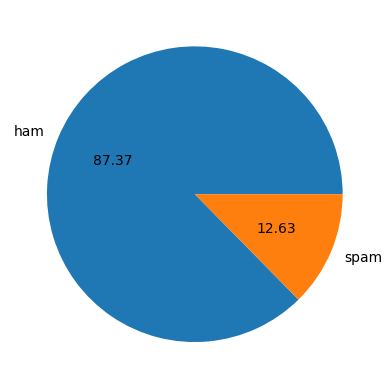

In [15]:
# Plot a pie chart to visualize the distribution of 'target' values
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [16]:
# Data is imbalanced

In [17]:
# Install and download NLTK resources for text analysis
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
# Add a new column with the number of characters in each 'text' entry
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# Add a new column with the number of words in each 'text' entry
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
# Add a new column with the number of sentences in each 'text' entry
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
# Show descriptive statistics for 'num_characters', 'num_words', and 'num_sentences' columns
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# Show descriptive statistics for 'num_characters', 'num_words', and 'num_sentences' for 'Ham' messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# Show descriptive statistics for 'num_characters', 'num_words', and 'num_sentences' for 'Spam' messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

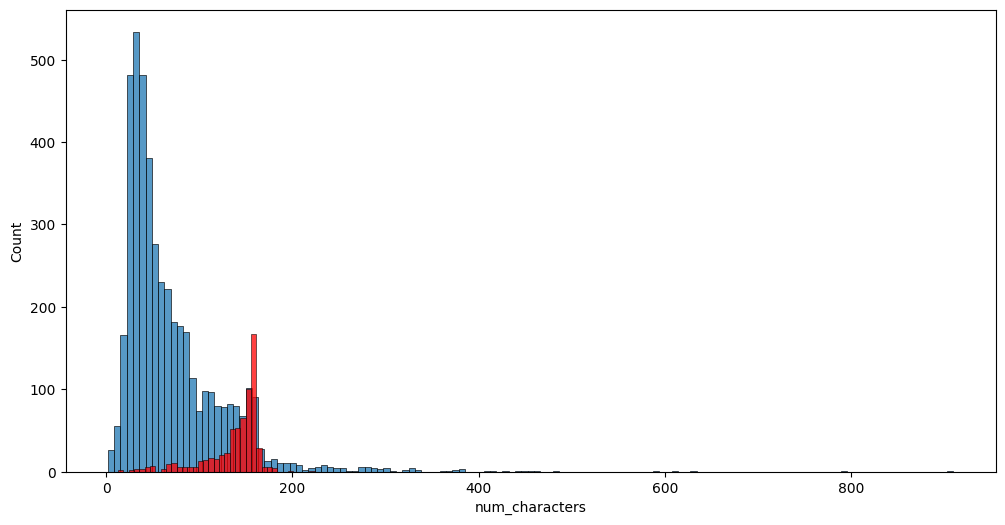

In [24]:
# Plot histograms of 'num_characters' for 'Ham' and 'Spam' messages
import seaborn as sns
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

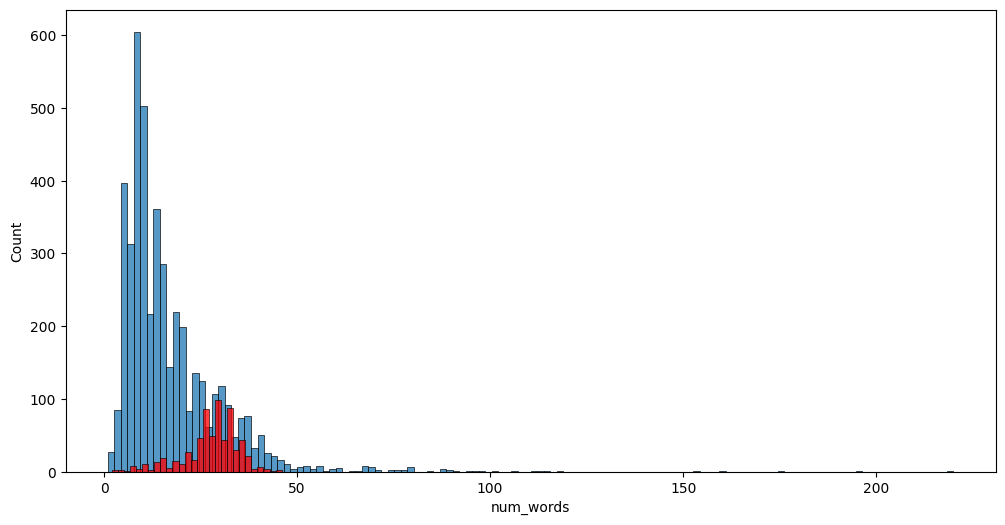

In [25]:
# Plot histograms of 'num_words' for 'Ham' and 'Spam' messages
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

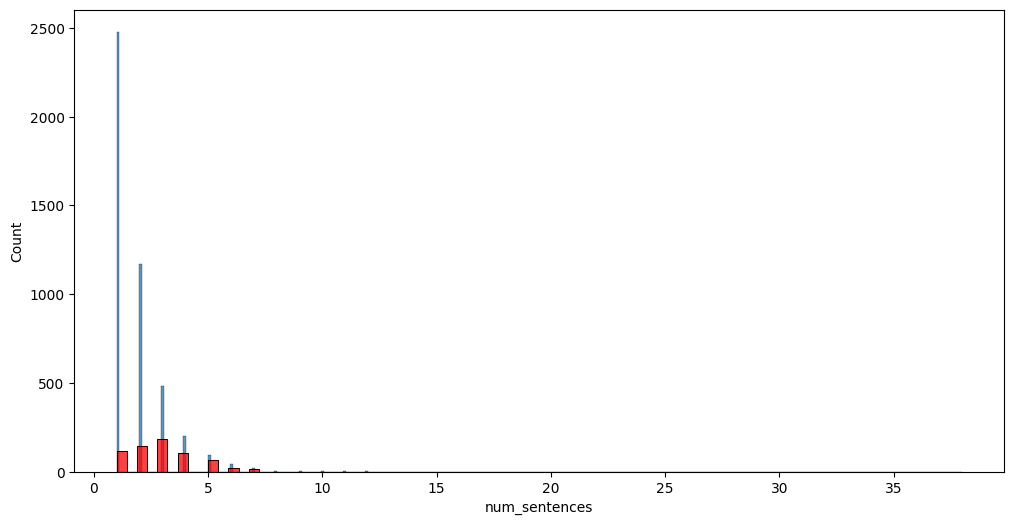

In [26]:
# Plot histograms of 'num_sentences' for 'Ham' and 'Spam' messages
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red')

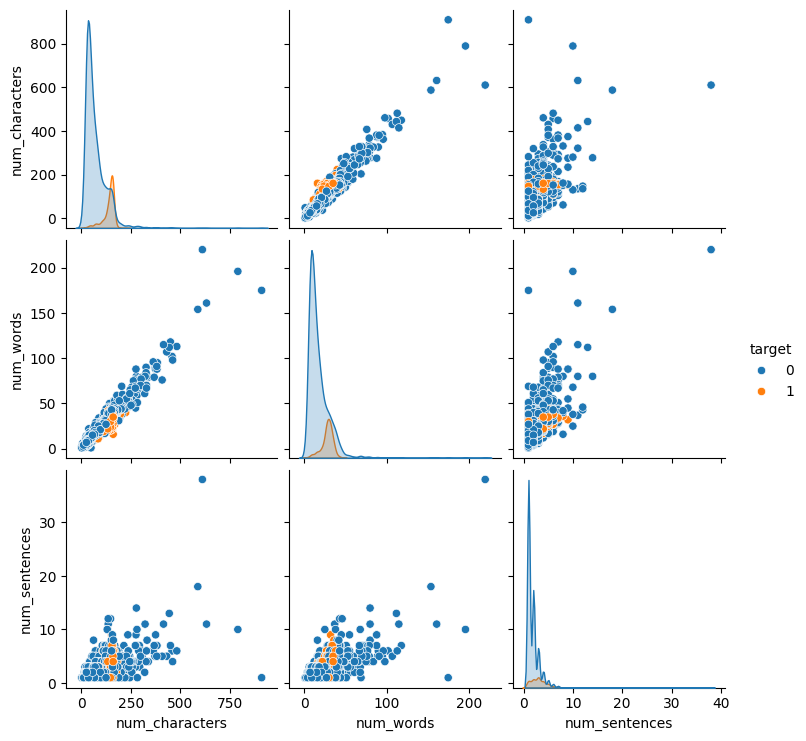

In [27]:
# Plot pairwise relationships and correlations between columns, colored by 'target'
sns.pairplot(df, hue = 'target')

<Axes: >

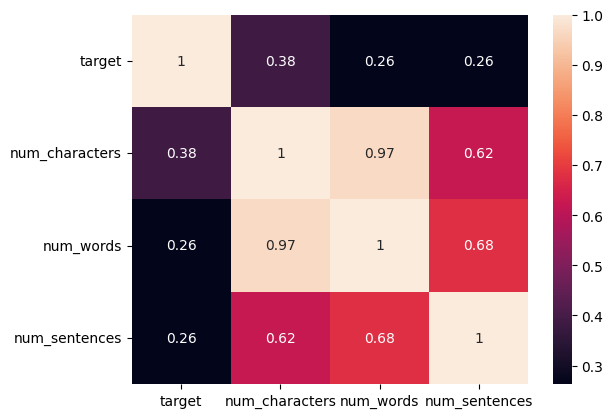

In [28]:
# Convert 'target' column to numeric, then calculate and plot the correlation heatmap for numerical columns
df['target'] = pd.to_numeric(df['target'])
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot = True)

##Data Preprocessing
- Lowercase
- Tokenization
- Removing special characters
- Removing stop words and punctuations
- Stemming

In [29]:
# Download stopwords, import them, and display punctuation and English stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
# Function to preprocess text: convert to lowercase, tokenize, remove special characters, stopwords, and punctuation, and apply stemming
def transform_text(text):
  text = text.lower() # Lowercase

  text = nltk.word_tokenize(text) # Tokenization

  y = []
  for i in text: # Removing special characters
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text: # Removing stop words and puhctuations
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  from nltk.stem.porter import PorterStemmer
  ps = PorterStemmer()
  z = []
  for i in y: # Stemming
    z.append(ps.stem(i))

  return " ".join(z)

In [31]:
# Apply text transformation function to the 'text' column and store results in 'transformed_text'
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
# Initialize WordCloud with specified width, height, font size, and background color
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

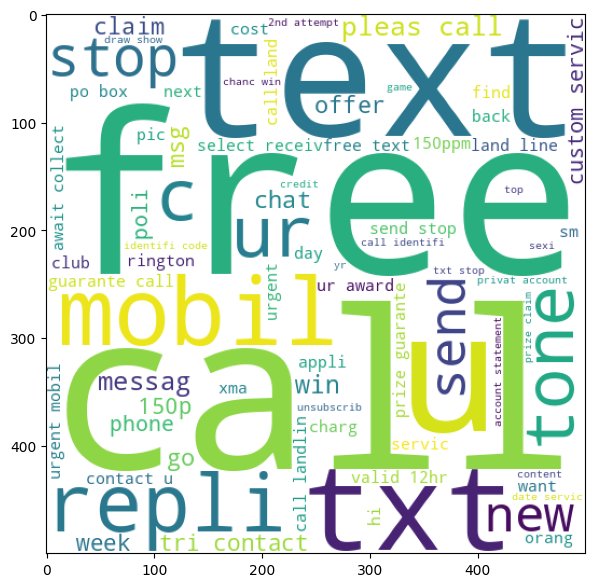

In [33]:
# Generate and display a word cloud for the most common words in spam messages
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15, 7))
plt.imshow(spam_wc)

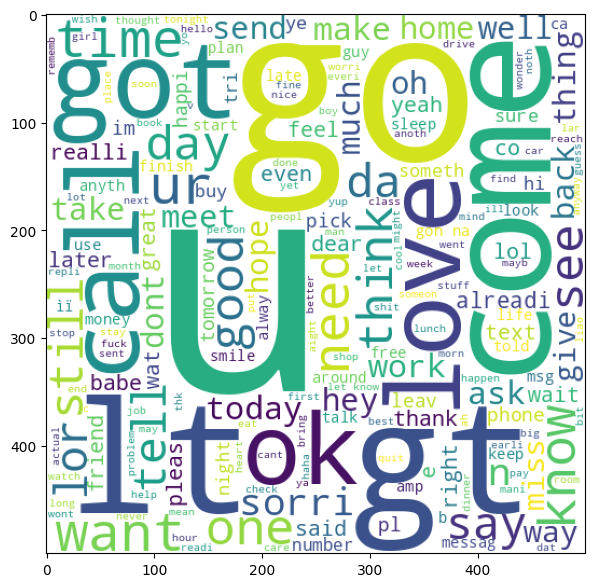

In [34]:
# Generate and display a word cloud for the most common words in ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15, 7))
plt.imshow(spam_wc)

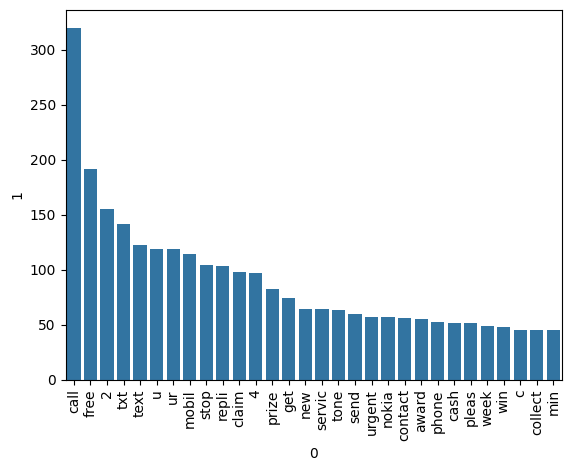

In [35]:
# Create a bar plot of the 30 most common words in spam messages
from collections import Counter
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=spam_df[0], y=spam_df[1]) # Use the 'x' and 'y' keywords to specify the columns
plt.xticks(rotation='vertical')
plt.show()

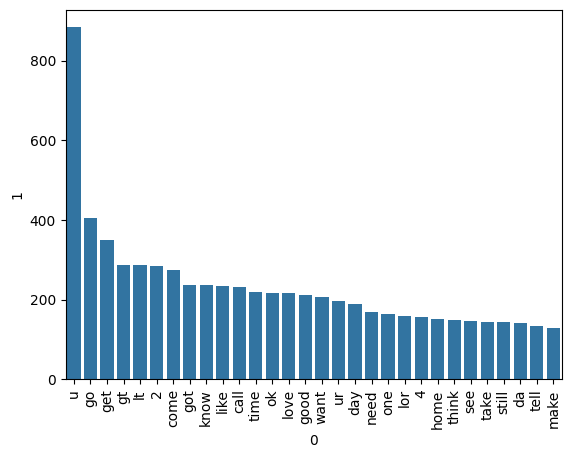

In [36]:
# Create a bar plot of the 30 most common words in ham messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
spam_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=spam_df[0], y=spam_df[1]) # Use the 'x' and 'y' keywords to specify the columns
plt.xticks(rotation='vertical')
plt.show()

##Model Building

In [37]:
# Import and initialize CountVectorizer and TfidfVectorizer for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [38]:
# Convert 'transformed_text' to a matrix of token counts using TF-IDF for better precision
    # X = cd.fit_transform(df['transformed_text']).toarray() -> Has less precision
    # from sklearn.preprocessing import MinMaxScaler  -> Has less precision
      # scaler = MinMaxScaler()
      # X = scaler.fit_transform(X)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [39]:
# Extract the 'target' column from the dataframe as a NumPy array
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
# Split data into 80% train and 20% test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [41]:
# Import Naive Bayes classifiers and metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [42]:
# Train Gaussian Naive Bayes, make predictions, and print accuracy, confusion matrix, and precision
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [43]:
# Train Multinomial Naive Bayes, make predictions, and print accuracy, confusion matrix, and precision
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [44]:
# Train Bernoulli Naive Bayes, make predictions, and print accuracy, confusion matrix, and precision
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [45]:
# Import various ML models for comparison, with Multinomial Naive Bayes (MNB) as the best precision using TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [46]:
# Store initialized classifiers in a dictionary for easier model comparison
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [47]:
# Function to train a classifier, make predictions, and return accuracy and precision
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision

In [48]:
# Train the SVC model and return accuracy and precision on the test data
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [49]:
# Train each classifier, print its accuracy and precision, and store the results in lists
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

SVC accuracy is 0.9758220502901354
SVC precision is 0.9747899159663865
KN accuracy is 0.9052224371373307
KN precision is 1.0
NB accuracy is 0.9709864603481625
NB precision is 1.0
DT accuracy is 0.9294003868471954
DT precision is 0.8282828282828283
LR accuracy is 0.9584139264990329
LR precision is 0.9702970297029703
RF accuracy is 0.9758220502901354
RF precision is 0.9829059829059829
AdaBoost accuracy is 0.960348162475822
AdaBoost precision is 0.9292035398230089
BgC accuracy is 0.9584139264990329
BgC precision is 0.8682170542635659
ETC accuracy is 0.9748549323017408
ETC precision is 0.9745762711864406
GBDT accuracy is 0.9468085106382979
GBDT precision is 0.9191919191919192
xgb accuracy is 0.9671179883945842
xgb precision is 0.9262295081967213


In [50]:
# Create a DataFrame to display the accuracy and precision of each algorithm, sorted by precision
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


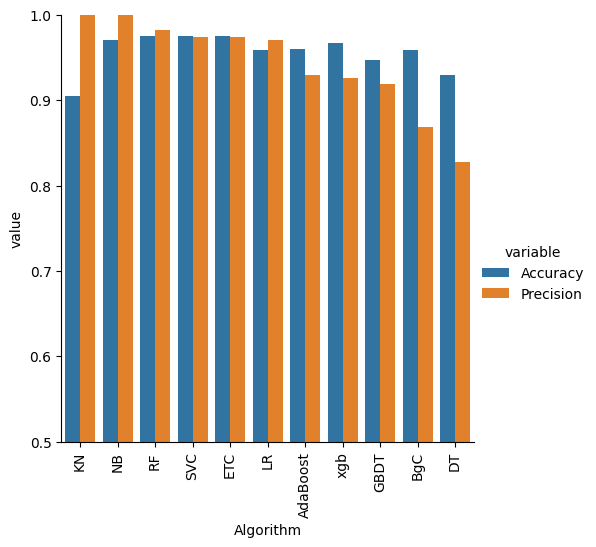

In [51]:
# Plot a bar chart to compare accuracy and precision of each algorithm, with values between 0.5 and 1.0
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df.melt(id_vars = 'Algorithm'), kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

##Improve Model

In [52]:
# Merge performance data with results after changing TF-IDF max_features and scaling, comparing different metrics
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [53]:
# Initialize and train a soft voting classifier with SVC, MultinomialNB, and ExtraTreesClassifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [54]:
# Predict with the voting classifier and print the accuracy and precision on the test data
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [55]:
# Initialize base estimators and a final estimator for stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [56]:
# Train a stacking classifier with base estimators and a final estimator, and print accuracy and precision
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [57]:
# Save the TF-IDF vectorizer and the MultinomialNB model to disk using pickle
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

##Running the model

In [62]:
import ipywidgets as widgets
from IPython.display import display
import pickle
import nltk
import string
from nltk.corpus import stopwords

# Ensure nltk resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load the saved model and vectorizer
try:
    tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
    model = pickle.load(open('model.pkl', 'rb'))
    print("Model and vectorizer loaded successfully.")
except Exception as e:
    print(f"Error loading model or vectorizer: {e}")

# Define text transformation function
def transform_text(text):
    text = text.lower()  # Lowercase
    text = nltk.word_tokenize(text)  # Tokenization
    text = [i for i in text if i.isalnum()]  # Remove special characters
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]  # Remove stopwords and punctuation
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    text = [ps.stem(i) for i in text]  # Stemming
    return " ".join(text)

# Function to predict spam or ham
def predict_spam(text):
    transformed_text = transform_text(text)
    text_vector = tfidf.transform([transformed_text]).toarray()
    prediction = model.predict(text_vector)
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Create a textbox widget
text_box = widgets.Text(
    description='Enter Message:',
    placeholder='Type your message here'
)

# Create a button widget
button = widgets.Button(description="Check for Spam")

# Create an output widget to display the result
output = widgets.Output()

# Define the function to be called when the button is clicked
def on_button_clicked(b):
    with output:
        # Clear previous output
        output.clear_output()
        # Get the text from the textbox
        message = text_box.value
        if message:  # Check if the message is not empty
            # Get prediction
            result = predict_spam(message)
            # Display the result
            print(f'The message is classified as: {result}')
        else:
            print("Please enter a message to check.")

# Link the button click event to the function
button.on_click(on_button_clicked)

# Display the widgets
display(text_box, button, output)

Model and vectorizer loaded successfully.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-62-b7d84e94fa30>:14: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Tfi

Text(value='', description='Enter Message:', placeholder='Type your message here')

Button(description='Check for Spam', style=ButtonStyle())

Output()